# **Pistes étudiées :** 

# **Piste Retenue :**

# **Train :**

In [2]:
%load_ext autoreload
%autoreload 2

import torch
from torch import nn
import torch.nn.functional as F
from torch.distributions import Categorical
from torch.distributions import MultivariateNormal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from typing import Tuple, Optional, Dict
import gymnasium as gym
from env import MazeEnv
from simulate import simulation_config , train, evaluate, finetune

Episode 0, Reward: -9.60,Evacuated: 0,Deactivated: 4, Actor Loss: 0.03, Critic Loss: 0.93
Episode 1, Reward: -13.80,Evacuated: 0,Deactivated: 4, Actor Loss: 0.05, Critic Loss: 1.02
Episode 2, Reward: -4.50,Evacuated: 0,Deactivated: 4, Actor Loss: 0.02, Critic Loss: 0.97
Episode 3, Reward: -4.20,Evacuated: 0,Deactivated: 4, Actor Loss: 0.02, Critic Loss: 1.13
Episode 4, Reward: -3.80,Evacuated: 0,Deactivated: 4, Actor Loss: 0.01, Critic Loss: 1.11
Episode 5, Reward: -34.30,Evacuated: 0,Deactivated: 4, Actor Loss: 0.05, Critic Loss: 1.16
Episode 6, Reward: -6.80,Evacuated: 0,Deactivated: 4, Actor Loss: 0.05, Critic Loss: 1.44
Episode 7, Reward: -14.40,Evacuated: 0,Deactivated: 4, Actor Loss: 0.04, Critic Loss: 1.15
Episode 8, Reward: -4.80,Evacuated: 0,Deactivated: 4, Actor Loss: 0.05, Critic Loss: 1.14
Episode 9, Reward: -0.40,Evacuated: 0,Deactivated: 4, Actor Loss: -0.02, Critic Loss: 1.19
Episode 10, Reward: -18.40,Evacuated: 0,Deactivated: 4, Actor Loss: 0.03, Critic Loss: 1.00
Epis

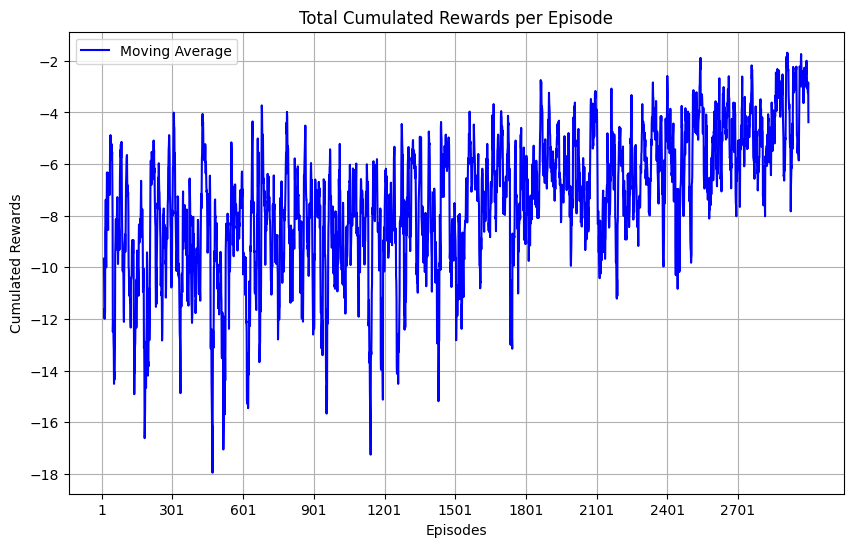

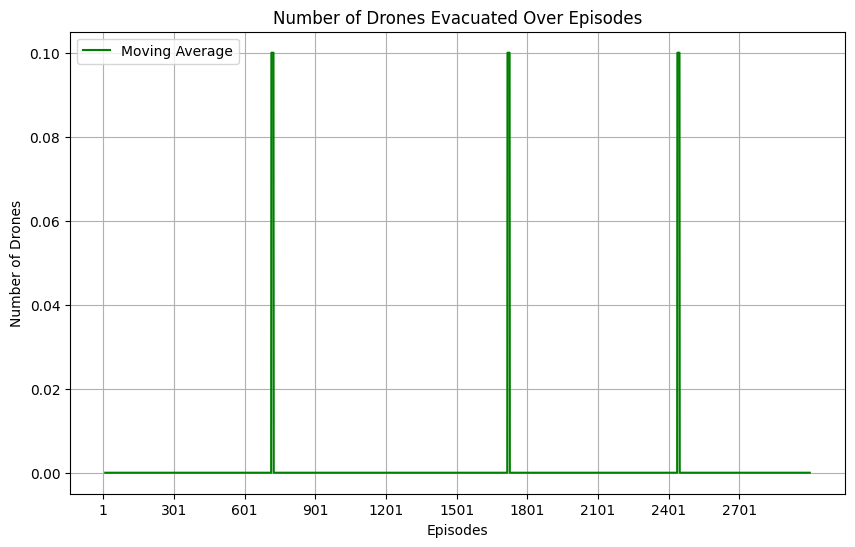

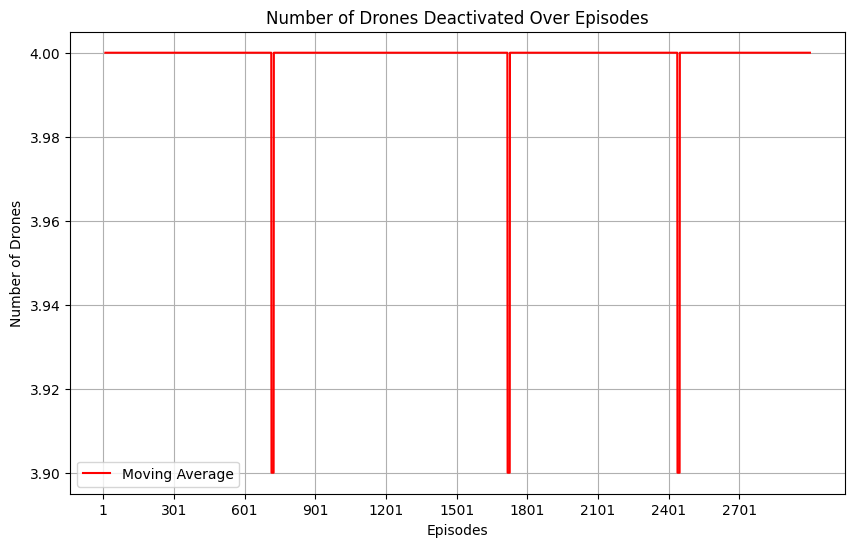

In [6]:
agent = train()

In [ ]:
agent = finetune()

# **Evaluation :**

In [8]:
# Load the trained agent
nv, agents, config = simulation_config('config.json', new_agent = False)
all_results = evaluate(configs_paths=['config.json'], trained_agent=agents)


--- Evaluating Configuration: config.json ---
Episode 1/10, Step 18, Reward: 3.40, Evacuated: 0, Deactivated: 4
Episode 2/10, Step 19, Reward: 6.90, Evacuated: 2, Deactivated: 2
Episode 3/10, Step 24, Reward: 6.40, Evacuated: 3, Deactivated: 1
Episode 4/10, Step 22, Reward: 1.10, Evacuated: 0, Deactivated: 4
Episode 5/10, Step 20, Reward: 7.60, Evacuated: 3, Deactivated: 1
Episode 6/10, Step 64, Reward: -3.80, Evacuated: 2, Deactivated: 2
Episode 7/10, Step 19, Reward: 8.00, Evacuated: 3, Deactivated: 1
Episode 8/10, Step 15, Reward: 2.60, Evacuated: 0, Deactivated: 4
Episode 9/10, Step 18, Reward: 4.30, Evacuated: 0, Deactivated: 4
Episode 10/10, Step 17, Reward: 5.00, Evacuated: 1, Deactivated: 3


In [4]:


import os
# iterate over eval folder
evacuated_total = 0
for file in os.listdir('eval_configs/'):
    _, agents, config = simulation_config(f'eval_configs/{file}', new_agent=False)
    #turn off warning
    import warnings
    warnings.filterwarnings("ignore")
    agents.actor.load_state_dict(torch.load('./models/actor_best.pth'))
    agents.critic.load_state_dict(torch.load('./models/critic_best.pth'))
    eval_configs = [f'eval_configs/{file}']
    all_results, evacuated = evaluate(configs_paths=eval_configs, trained_agent=agents)
    evacuated_total += evacuated
print("Total evacuated : ",evacuated_total,"/",400)




--- Evaluating Configuration: eval_configs/config_1.json ---
Episode 1/10, Step 2875, Reward: -348.50, Evacuated: 1, Deactivated: 3
Episode 2/10, Step 151, Reward: -18.80, Evacuated: 2, Deactivated: 2
Episode 3/10, Step 30, Reward: 4.80, Evacuated: 3, Deactivated: 1
Episode 4/10, Step 10000, Reward: -1066.90, Evacuated: 0, Deactivated: 3
Episode 5/10, Step 75, Reward: 1.20, Evacuated: 3, Deactivated: 1
Episode 6/10, Step 85, Reward: -1.20, Evacuated: 0, Deactivated: 4
Episode 7/10, Step 73, Reward: -1.40, Evacuated: 3, Deactivated: 1
Episode 8/10, Step 222, Reward: -23.70, Evacuated: 2, Deactivated: 2
Episode 9/10, Step 5482, Reward: -724.50, Evacuated: 3, Deactivated: 1
Episode 10/10, Step 4028, Reward: -613.60, Evacuated: 3, Deactivated: 1

--- Evaluating Configuration: eval_configs/config_10.json ---
Episode 1/10, Step 24, Reward: 8.60, Evacuated: 0, Deactivated: 4
Episode 2/10, Step 82, Reward: 0.80, Evacuated: 0, Deactivated: 4
Episode 3/10, Step 40, Reward: 14.10, Evacuated: 0, 

# **Test**

In [ ]:
# pilote agent :

import  time


config_path="config.json"
env, agent, config = simulation_config(config_path,new_agent=True)
n_agents = env.num_agents

next_states, info = env.reset()  # (n_agents, obs_dim)

while True : 
    time.sleep(1)
    print(get_possible_actions(next_states[0]))
    time.sleep(1)
    actions = [int(input())]

    next_states, rewards, dones, _ ,info= env.step(actions)  
    print(next_states)
    if dones:
        next_states, info = env.reset()



In [ ]:
def get_possible_actions(state):
    x, y, orientation = state[0], state[1], int(state[2])
    lidar_main_dist, lidar_main_type = state[6], state[7]
    lidar_right_dist, lidar_right_type = state[8], state[9]
    lidar_left_dist, lidar_left_type = state[10], state[11]
    
    possible_actions = {0, 5, 6}  # steady et rotations toujours possibles
    
    # Déterminer quel lidar correspond à quelle direction dans la grille
    if orientation == 0:  # Agent orienté vers le haut
        up,  left, right = (lidar_main_dist, lidar_main_type), (lidar_left_dist, lidar_left_type), (lidar_right_dist, lidar_right_type)
    elif orientation == 1:  # Agent orienté vers la droite
        up, down, right = (lidar_left_dist, lidar_left_type), (lidar_right_dist, lidar_right_type), (lidar_main_dist, lidar_main_type)
    elif orientation == 2:  # Agent orienté vers le bas
       down, left, right =  (lidar_main_dist, lidar_main_type), (lidar_right_dist, lidar_right_type), (lidar_left_dist, lidar_left_type)
    else:  # Agent orienté vers la gauche
        up, down, left  =  (lidar_right_dist, lidar_right_type), (lidar_left_dist, lidar_left_type), (lidar_main_dist, lidar_main_type)


    # Vérifier les déplacements en fonction des obstacles détectés
    try : 
        print("UP ", up)
        if up[1] == 2 or up[0] > 2:
            possible_actions.add(1)
        if up[1] == 0  or up[0] > 1:
            possible_actions.add(1)  # up (vers le haut de la grille)
    except :
        pass
    try : 
        print("down : ", down)
        if down[1] == 2 or down[0] > 2:
            possible_actions.add(2)
        if down[1] == 0  or down[0] > 1:
            possible_actions.add(2)  # down (vers le bas de la grille)
    except : pass
    try :
        print("left :", left)
        if left[1] == 2 or left[0] > 2:
            possible_actions.add(3)
        if left[1] == 0  or left[0] > 1:
            possible_actions.add(3) # left (vers la gauche de la grille)
    except: pass
    try : 
        print("right : ", right)
        if right[1] == 2 or right[0] > 2:
            possible_actions.add(4)
        if right[1] == 0  or right[0] > 1:
            possible_actions.add(4) # right (vers la droite de la grille)
    except : pass
    return list(possible_actions)
